In [145]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [146]:
df = pd.read_csv('burnt_area_study_encoder.csv')

In [147]:
df.head()

,Unnamed: 0,fid,lat,long,LULC,DN,Ano,freq,Prior,alt,...,solo_NC,IBGE_D,IBGE_DP,IBGE_F,IBGE_FP,IBGE_M,IBGE_MP,IBGE_NC,IBGE_R,IBGE_RP
0,0,279,-44.806978,-22.795334,15,8,2000,1.0,3,1202.368005,...,0,0,0,0,0,0,0,1,0,0
1,1,298,-44.793975,-22.787856,3,8,2000,1.5,3,1297.729980,...,0,1,0,0,0,0,0,0,0,0
2,2,299,-44.790674,-22.787249,3,8,2000,1.0,3,1394.218982,...,0,1,0,0,0,0,0,0,0,0
3,3,302,-44.794087,-22.786261,3,8,2000,2.0,3,1241.893311,...,0,1,0,0,0,0,0,0,0,0
4,4,318,-44.872870,-22.785902,3,8,2000,1.0,3,1042.134798,...,0,1,0,0,0,0,0,0,0,0


In [148]:
#sb.pairplot(df)
df['freq'].describe()

count    487.000000
mean       1.718369
std        1.264384
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: freq, dtype: float64

In [169]:
#padronização dos dados
from sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit(df)
df= scaler.transform(df)
scaler.transform(df)

In [172]:
#df.describe()

array([[-1.72849788, -1.41511583, -0.07522445, ...,  1.51345318,
        -0.13721681, -0.06421613],
       [-1.72138472, -1.39303563,  0.25506824, ..., -0.66074062,
        -0.13721681, -0.06421613],
       [-1.71427156, -1.39187351,  0.33892493, ..., -0.66074062,
        -0.13721681, -0.06421613],
       ...,
       [ 1.71427156,  1.39720445, -0.5099098 , ...,  1.51345318,
        -0.13721681, -0.06421613],
       [ 1.72138472,  1.39836657, -0.52702349, ...,  1.51345318,
        -0.13721681, -0.06421613],
       [ 1.72849788,  1.39952868, -0.53142396, ...,  1.51345318,
        -0.13721681, -0.06421613]])

In [209]:
#X = np.array(df.drop('LULC',axis = 1))
X =  df[:, 7:29]

In [210]:
X

array([[-0.56874111,  0.32630667, -0.40615998, ...,  1.51345318,
        -0.13721681, -0.06421613],
       [-0.17288509,  0.32630667, -0.14821295, ..., -0.66074062,
        -0.13721681, -0.06421613],
       [-0.56874111,  0.32630667,  0.1127826 , ..., -0.66074062,
        -0.13721681, -0.06421613],
       ...,
       [-0.56874111,  0.32630667, -0.54831512, ...,  1.51345318,
        -0.13721681, -0.06421613],
       [-0.56874111,  0.32630667, -0.48102699, ...,  1.51345318,
        -0.13721681, -0.06421613],
       [-0.56874111,  0.32630667, -0.52413185, ...,  1.51345318,
        -0.13721681, -0.06421613]])

In [211]:
##K-means

In [220]:
from sklearn.cluster import KMeans

In [221]:
kmeans = KMeans(n_clusters=3, random_state=0)
#kmeans = KMeans(n_clusters = 3, init = 'random')

In [222]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [223]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [224]:
##COMPARANDO AS CLASSES CRIADAS COM AS CLASSES EXISTENTES 

In [225]:
df['K-classes'] = kmeans.labels_

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [226]:
df

array([[-1.72849788, -1.41511583, -0.07522445, ...,  1.51345318,
        -0.13721681, -0.06421613],
       [-1.72138472, -1.39303563,  0.25506824, ..., -0.66074062,
        -0.13721681, -0.06421613],
       [-1.71427156, -1.39187351,  0.33892493, ..., -0.66074062,
        -0.13721681, -0.06421613],
       ...,
       [ 1.71427156,  1.39720445, -0.5099098 , ...,  1.51345318,
        -0.13721681, -0.06421613],
       [ 1.72138472,  1.39836657, -0.52702349, ...,  1.51345318,
        -0.13721681, -0.06421613],
       [ 1.72849788,  1.39952868, -0.53142396, ...,  1.51345318,
        -0.13721681, -0.06421613]])

In [227]:
#sb.pairplot(df,hue='LULC')

In [228]:
kmeans.cluster_centers_

array([[-0.32212506,  0.31067733, -0.47150522,  0.06795367, -0.22240801,
         0.02383255, -0.05449503, -0.11021655,  0.94994169, -0.72570364,
        -0.22767488, -0.32480768,  0.12268553,  0.35074023,  0.18837212,
        -0.05844818, -0.09100315, -0.17427278,  0.05069869, -0.45663263,
         0.07492473,  0.06342981],
       [ 0.53002062,  0.32630667,  1.03862954, -0.19866154, -0.02506158,
         0.17602287,  0.00361596,  0.03551578, -0.96171783,  1.10547601,
         0.34682081, -0.33825505, -0.11714565, -0.21190016, -0.15373891,
        -0.14479075, -0.09100315,  0.27096513, -0.0336988 ,  0.33060163,
        -0.06027428, -0.06421613],
       [-0.47700695, -2.83863536, -1.73340252,  0.44271484,  1.21075197,
        -0.81247732,  0.25823268,  0.41119407, -0.96171783, -0.72570364,
        -0.22767488,  2.9563491 , -0.15201725, -0.91907397, -0.33631758,
         0.86253917,  0.81345674, -0.19590694, -0.12076147,  0.98099756,
        -0.13721681, -0.06421613]])

In [229]:
distance = kmeans.fit_transform(X)
distance

array([[5.11896635, 5.79737897, 6.6539119 ],
       [2.80118944, 4.44486006, 7.16964056],
       [3.62843305, 4.80602608, 7.14531915],
       ...,
       [5.01125054, 5.51361131, 6.18924694],
       [4.09163141, 4.7825053 , 5.78377684],
       [4.99171974, 5.55737376, 6.11200995]])

In [230]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

1 10714.0
2 9214.873660197916
3 7936.593765358526
4 7248.754873403902
5 6721.282687854766
6 6257.553809604415
7 5866.058339189165
8 5404.781252122799
9 4943.190580714538
10 4492.583848543188


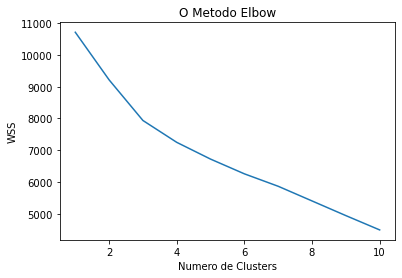

In [231]:
from sklearn.cluster import KMeans
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()


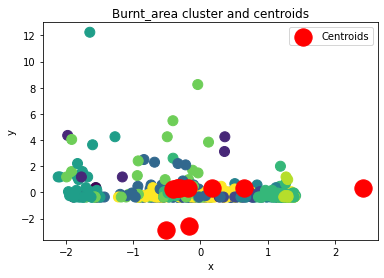

In [234]:
plt.scatter(X[:, 2], X[:,3], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Burnt_area cluster and centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

In [111]:
#sb.pairplot(df,'K-classes')